In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [332]:
train_data=pd.read_excel(r"/Users/rinki/Desktop/Flight_Ticket_Participant_Datasets 2/Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [333]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [334]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [335]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

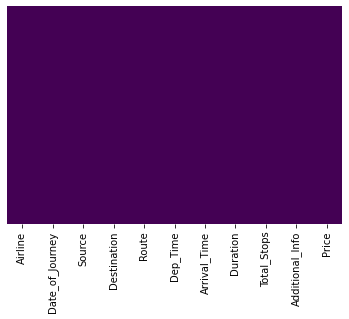

In [336]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [337]:
train_data.dropna(inplace=True)

In [338]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [339]:
train_data['Day_of_Journey']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [340]:
train_data['Month_of_Journey']=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [341]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [342]:
#seperate the Dep_time values
train_data['Dep_hour']=pd.to_datetime(train_data["Dep_Time"]).dt.hour
#extractt minutes
train_data['Dep_mints']=pd.to_datetime(train_data["Dep_Time"]).dt.minute

#drop Dep_time Column as already we sepearted the time into different column
train_data.drop(['Dep_Time'],axis=1,inplace=True)

#seperate the Dep_time values
train_data['Arrival_hour']=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
#extractt minutes
train_data['Arrival_mints']=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#drop Dep_time Column as already we sepearted the time into different column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)



In [343]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [344]:
#extract duraction hours & mins.
duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))#extract hours
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))#extract mints

In [345]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins
train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

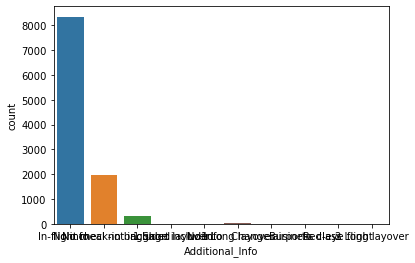

In [346]:
sns.countplot(x='Additional_Info',data=train_data)

<AxesSubplot:xlabel='Source', ylabel='count'>

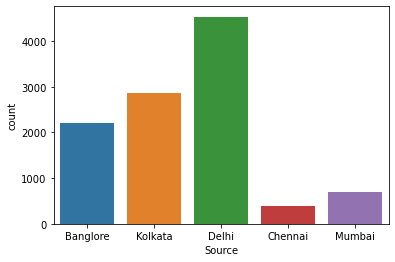

In [347]:
sns.countplot(x='Source',data=train_data)

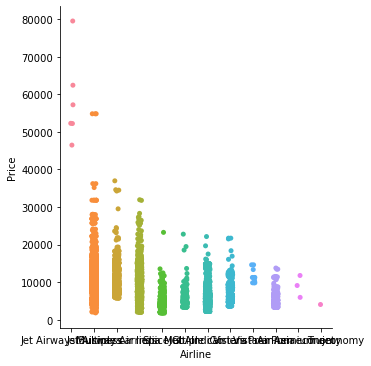

In [348]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price", ascending = False))
plt.show()

In [349]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

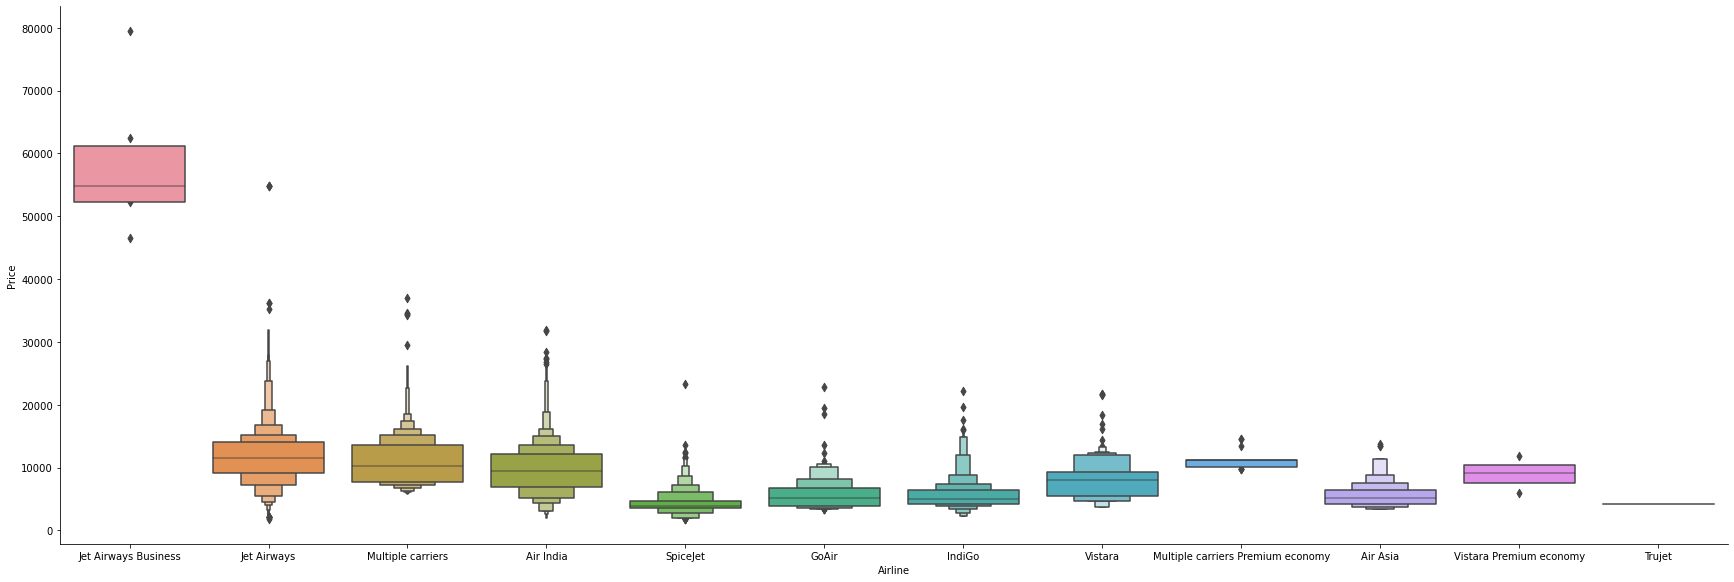

In [350]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [351]:
#will encode data by using oneHotEncoding coz its Nominal Categorical data
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


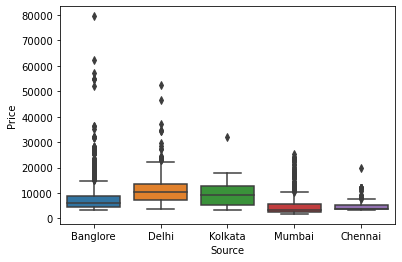

In [352]:
sns.boxplot(y="Price",x="Source",data=train_data.sort_values("Price", ascending = False))
plt.show()

In [353]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [354]:
#will encode data by using oneHotEncoding coz its Nominal Categorical data
Source=train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [355]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

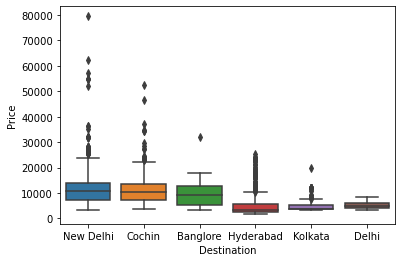

In [356]:
sns.boxplot(y="Price",x="Destination",data=train_data.sort_values("Price", ascending = False))
plt.show()

In [357]:
#will encode data by using oneHotEncoding coz its Nominal Categorical data
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


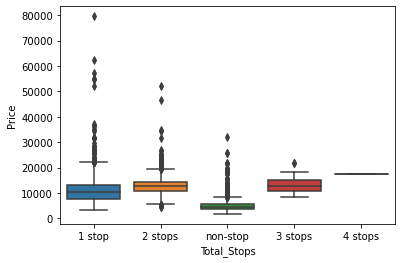

In [358]:
sns.boxplot(y="Price",x="Total_Stops",data=train_data.sort_values("Price", ascending = False))
plt.show()

In [359]:
#drop additional info coz our most of the data is comes under no info as shown in above graph
#drop route coz  its related to total stops
train_data.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [360]:
#encode categorical data via label encoder
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


<AxesSubplot:ylabel='Source'>

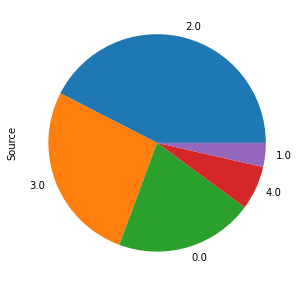

In [361]:
plt.figure(figsize=(5,5))
data.Source.value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='Airline'>

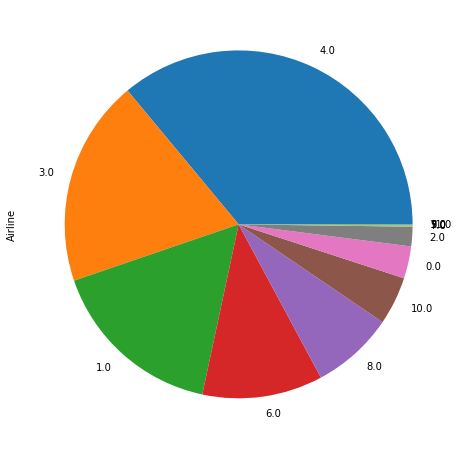

In [362]:
plt.figure(figsize=(8,8))
data.Airline.value_counts().plot(kind = 'pie')

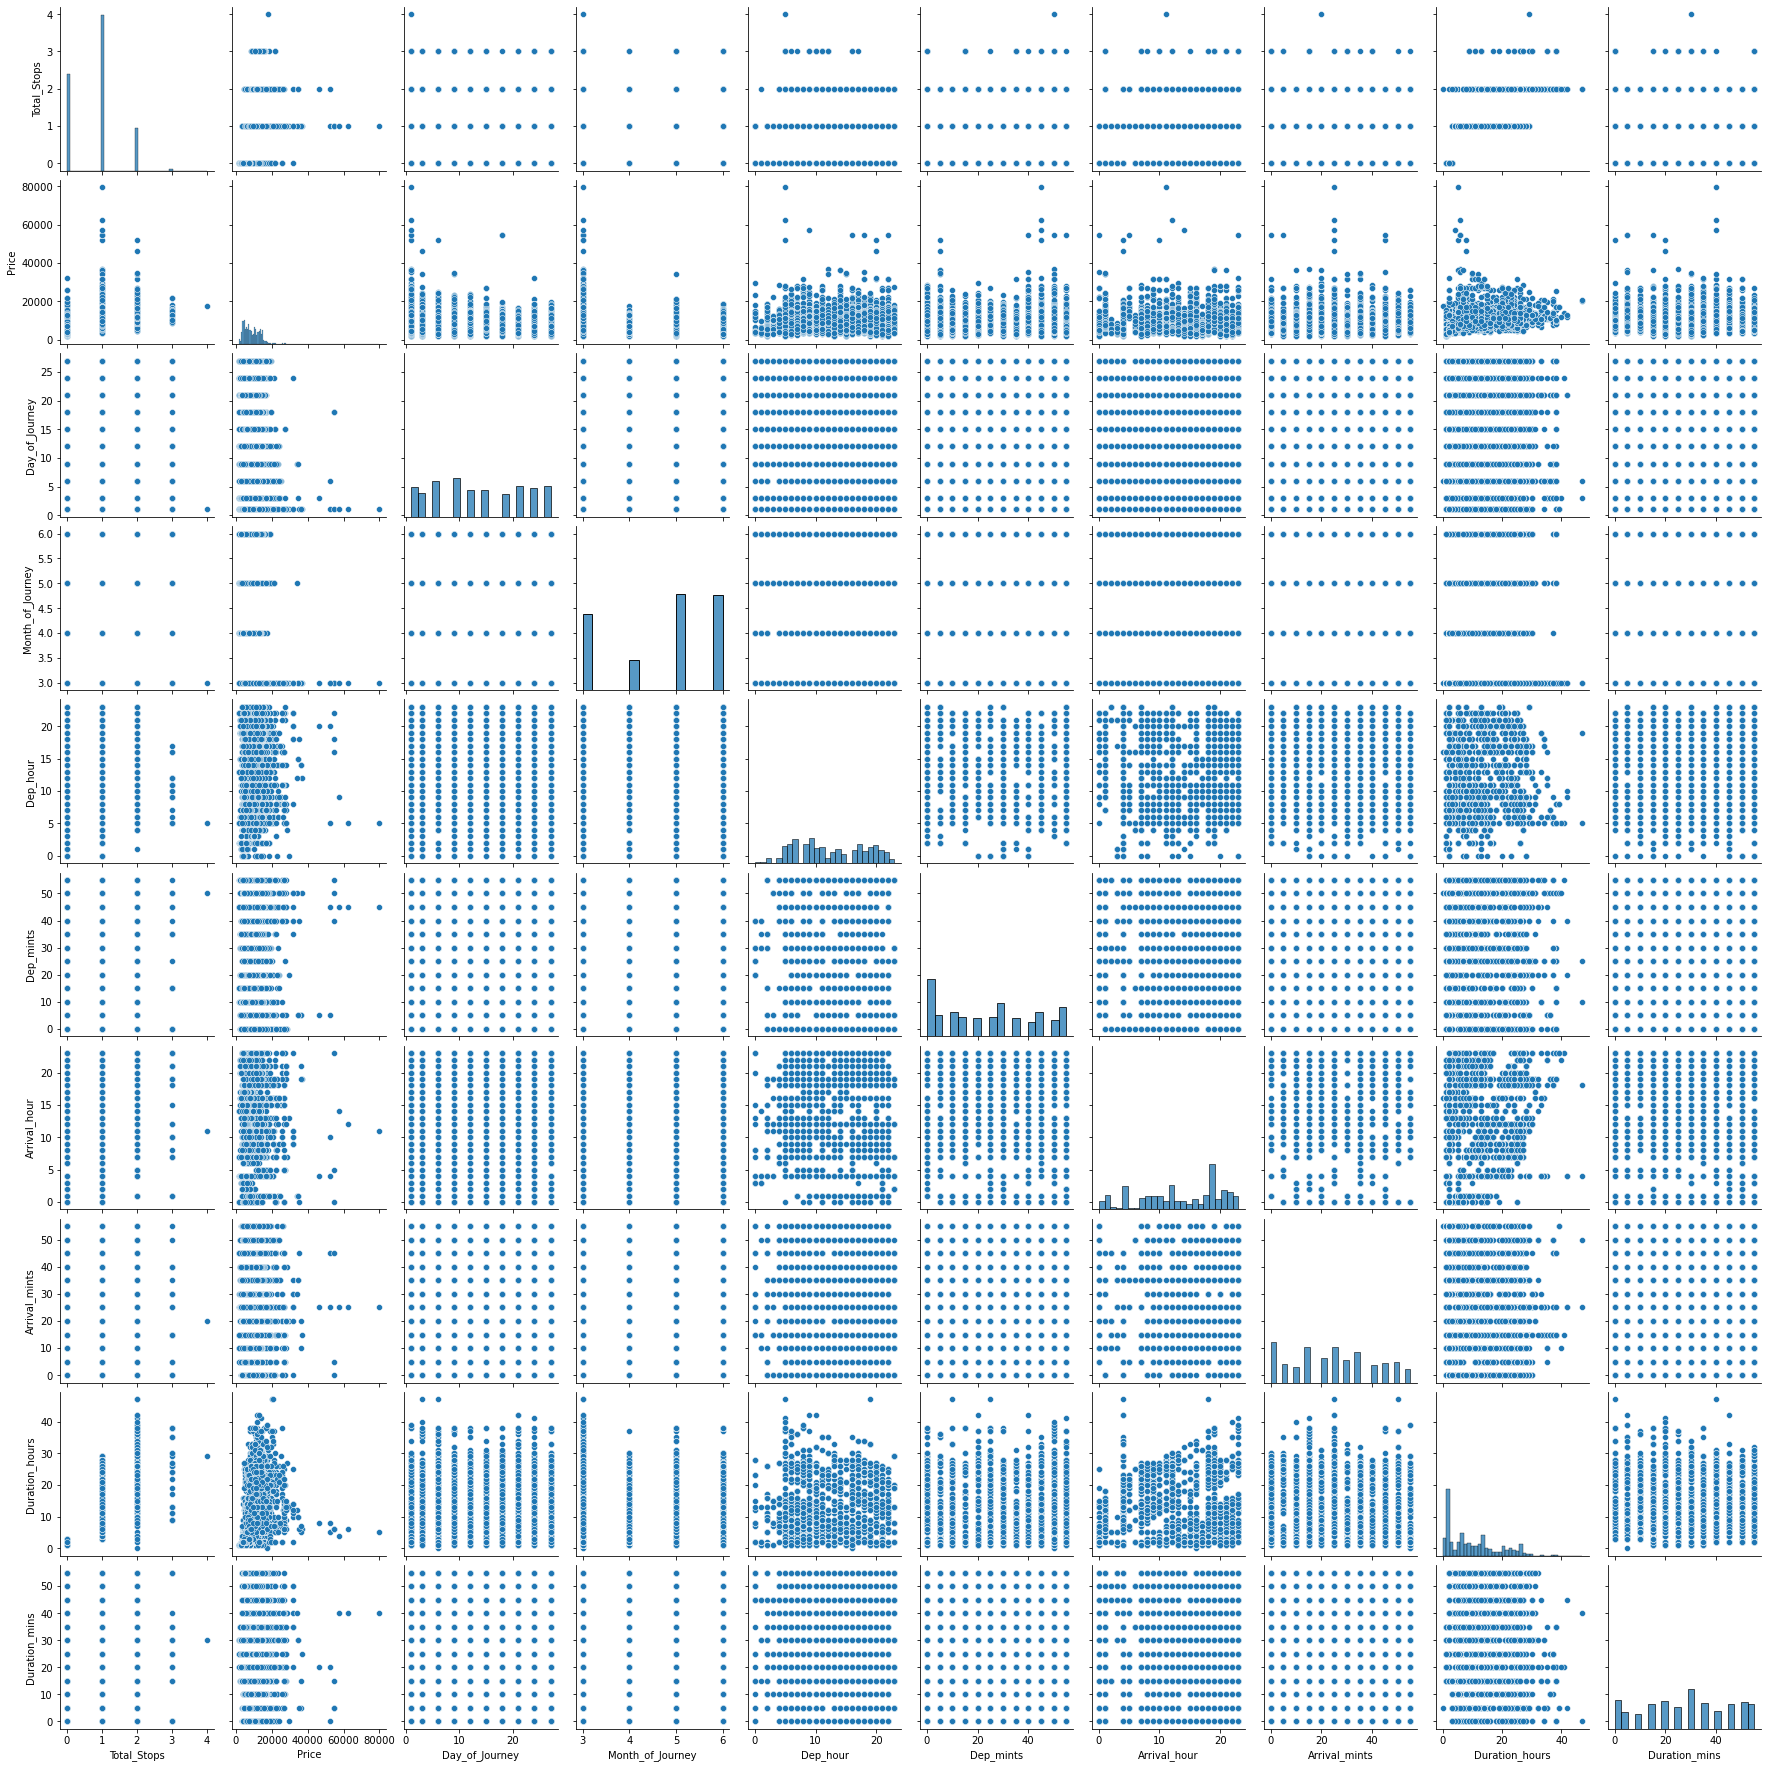

In [363]:
sns.pairplot(train_data)

In [364]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [365]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [366]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [367]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

# Test Data

In [407]:
test_data=pd.read_excel(r"/Users/rinki/Desktop/Flight_Ticket_Participant_Datasets 2/Test_set.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [408]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [409]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [410]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

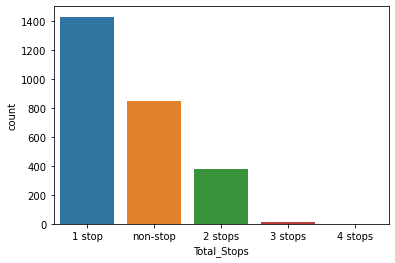

In [411]:
sns.countplot(x="Total_Stops",data=test_data)
plt.show()

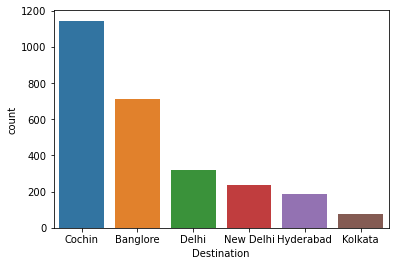

In [412]:
sns.countplot(x="Destination",data=test_data)
plt.show()

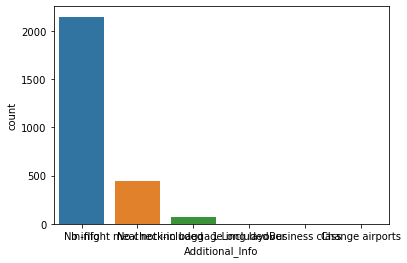

In [413]:
sns.countplot(x="Additional_Info",data=test_data)
plt.show()

In [414]:
#extract day & month of journey
test_data['Journey_Day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_month']=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
#drop the 'Date_of_Journey' as we already extract the data
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

#seperate the Dep_time values
test_data['Dep_hour']=pd.to_datetime(test_data["Dep_Time"]).dt.hour
#extractt minutes
test_data['Dep_mints']=pd.to_datetime(test_data["Dep_Time"]).dt.minute

#drop Dep_time Column as already we sepearted the time into different column
test_data.drop(['Dep_Time'],axis=1,inplace=True)

#seperate the Dep_time values
test_data['Arrival_hour']=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
#extractt minutes
test_data['Arrival_mints']=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

#drop Dep_time Column as already we sepearted the time into different column
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

#extract duraction hours & mins.
duration=list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))#extract hours
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))#extract mints

test_data["Duration_hours"]=duration_hours
test_data["Duration_mins"]=duration_mins
test_data.drop(['Duration'],axis=1,inplace=True)

#will encode data by using oneHotEncoding coz its Nominal Categorical data
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

#will encode data by using oneHotEncoding coz its Nominal Categorical data
Source=test_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

#will encode data by using oneHotEncoding coz its Nominal Categorical data
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

#encode categorical data via label encoder
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)
test_data.head()
test_data=pd.concat([test_data,Airline,Source,Destination],axis=1)
test_data.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

In [416]:
test_data.head()

,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [378]:
test_data.shape

(2671, 28)

In [379]:
#Features
data_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_mints', 'Arrival_hour', 'Arrival_mints',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [381]:
data_train.shape

(10682, 30)

In [383]:
x=data_train.loc[:, ['Total_Stops','Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_mints', 'Arrival_hour', 'Arrival_mints',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [384]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [386]:
 train_data.corr()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Day_of_Journey,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Month_of_Journey,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_mints,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_mints,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


In [387]:
data_train.corr()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_mints,Arrival_hour,Arrival_mints,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Day_of_Journey,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Month_of_Journey,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_mints,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_mints,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


<AxesSubplot:>

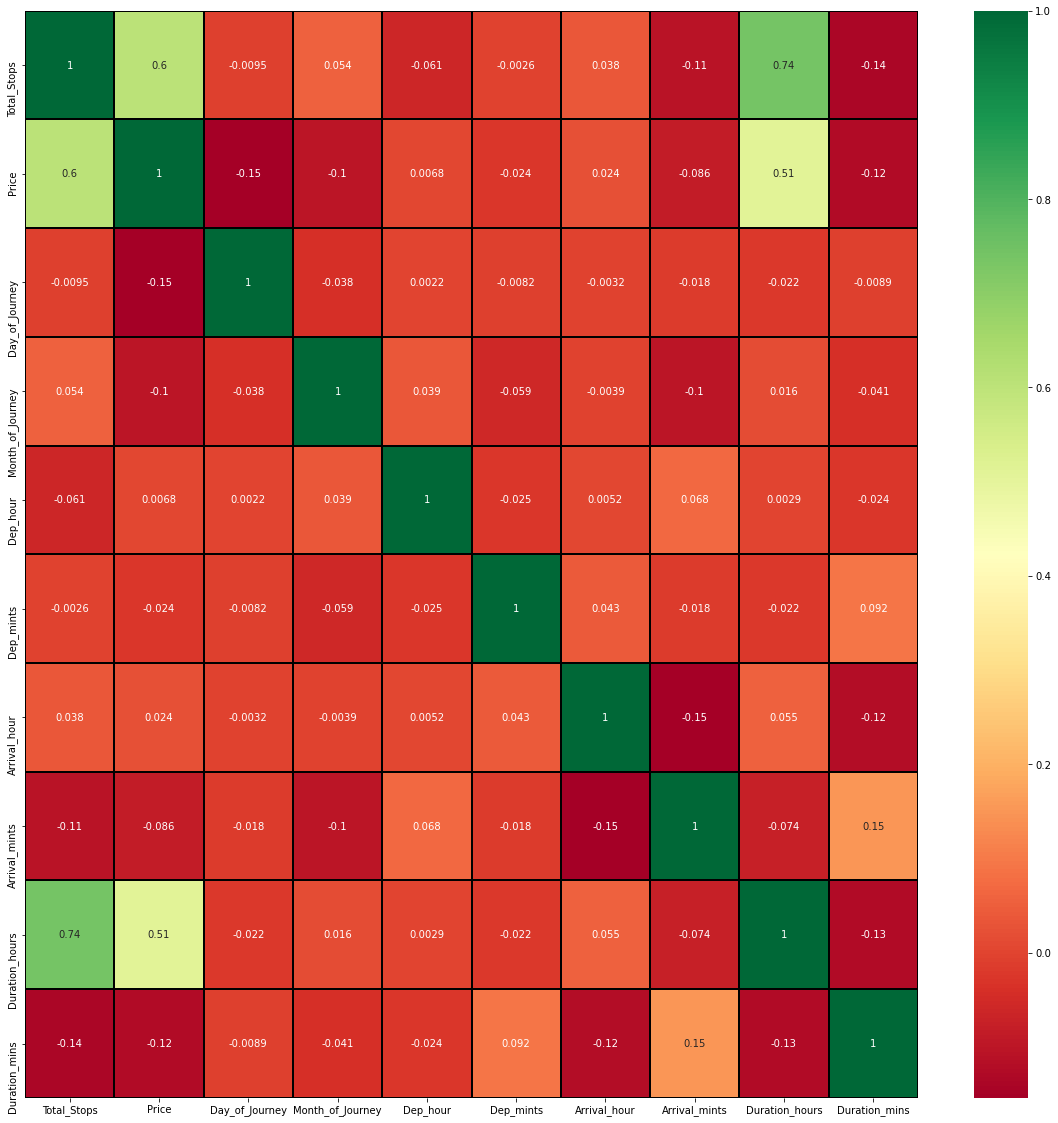

In [388]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, linewidth=1,linecolor='black',cmap='RdYlGn')

<AxesSubplot:>

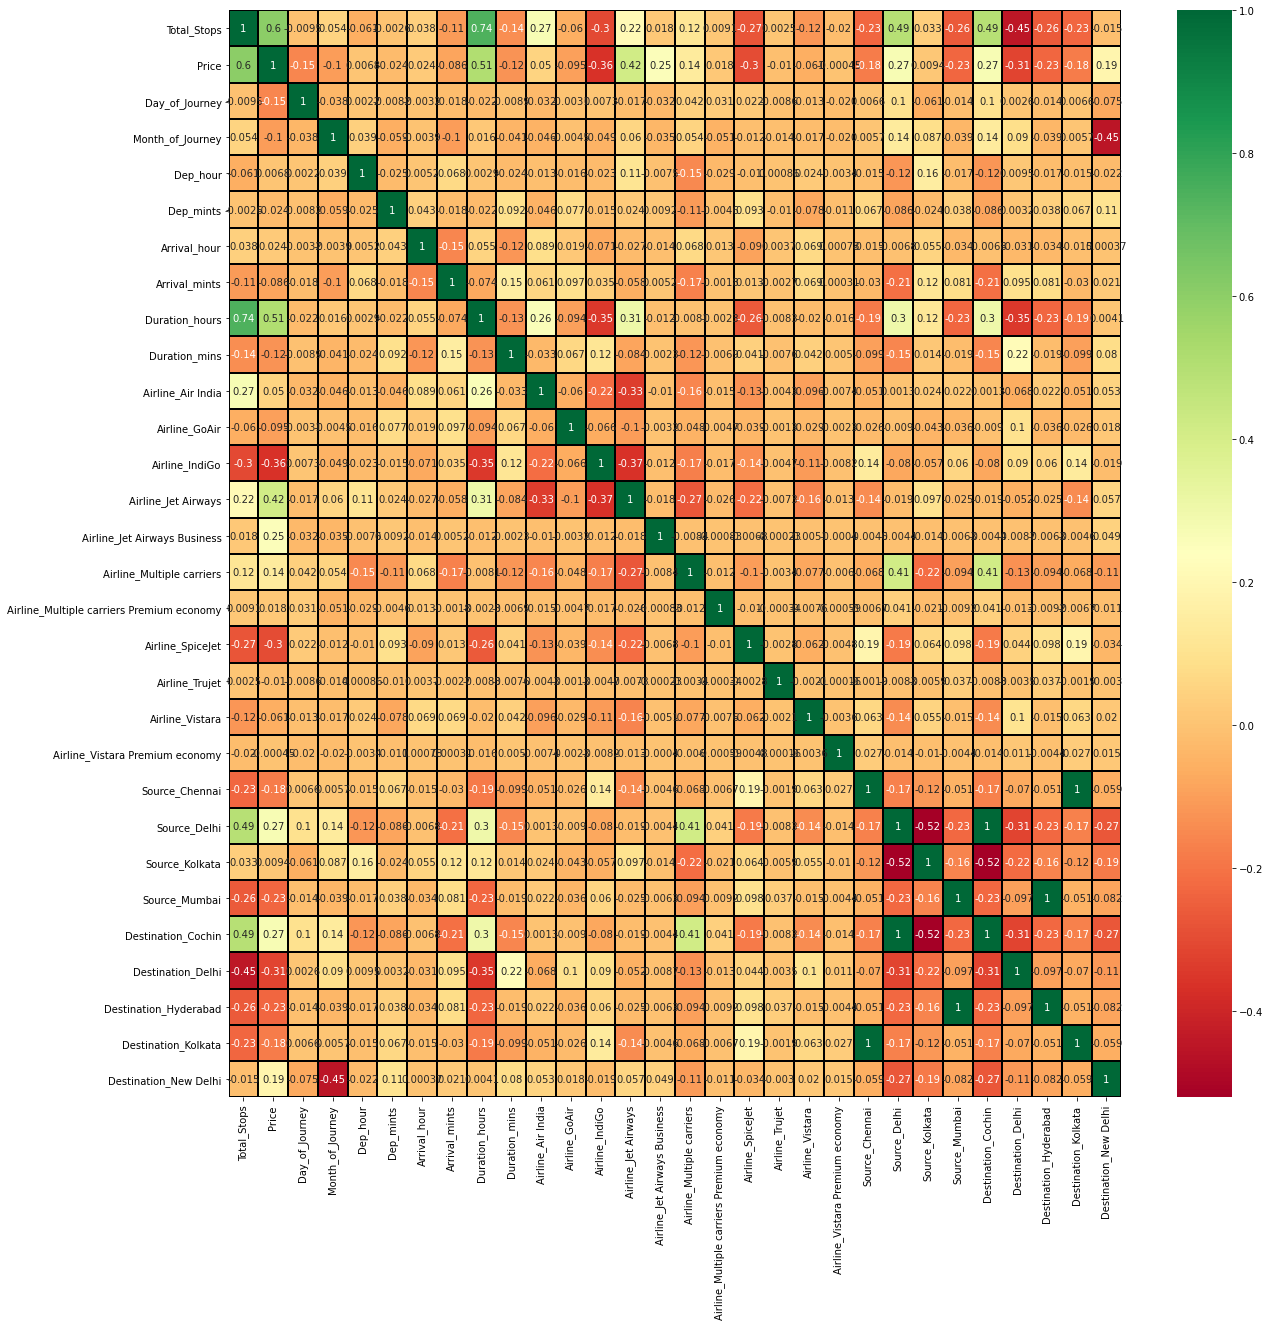

In [389]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(), annot=True, linewidth=1,linecolor='black',cmap='RdYlGn')

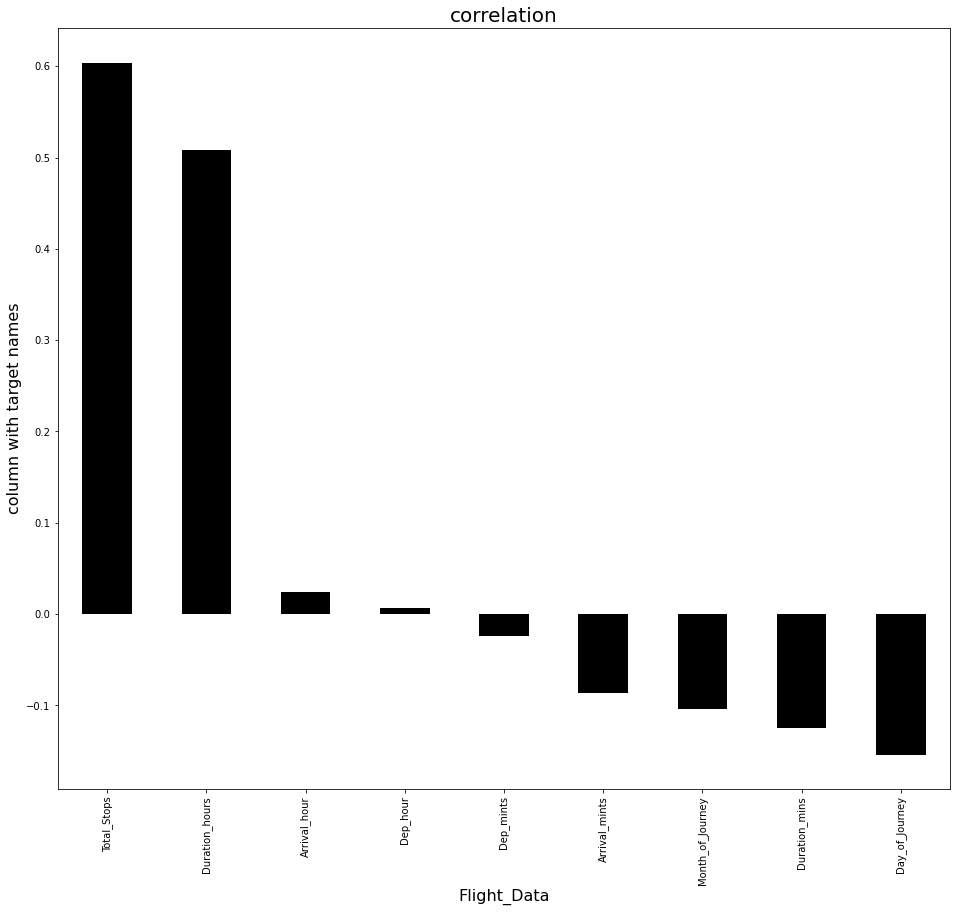

In [391]:
plt.figure(figsize=(16,14))
train_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='black')
plt.xlabel('Flight_Data',fontsize=16)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

In [395]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)
print(selection.feature_importances_)

[2.35957422e-01 1.42568610e-01 5.44628041e-02 2.45219808e-02
 2.13293454e-02 2.80363380e-02 1.87594165e-02 1.19323246e-01
 1.76175101e-02 9.57765162e-03 1.74991812e-03 1.78095063e-02
 1.35190309e-01 6.74176380e-02 1.84522970e-02 8.40402126e-04
 3.51516965e-03 1.06836390e-04 5.14249434e-03 8.98000398e-05
 5.60014888e-04 9.61196568e-03 3.08278270e-03 5.10115710e-03
 1.34160152e-02 1.40076945e-02 6.47582591e-03 5.23598068e-04
 2.47522497e-02]


<function matplotlib.pyplot.show(close=None, block=None)>

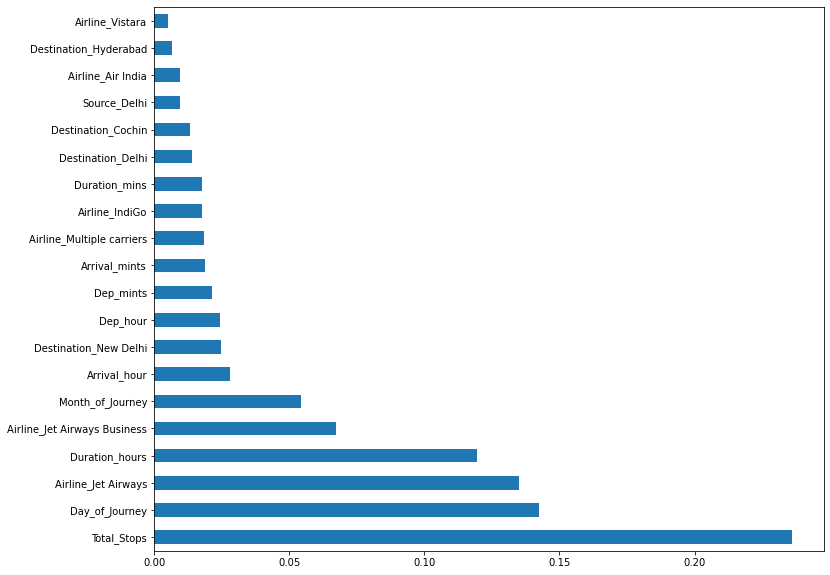

In [396]:
plt.figure(figsize=(12,10))
feat_importances=pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=670)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.9550123426252164

In [404]:
rfr.score(x_test,y_test)

0.8308450027497445

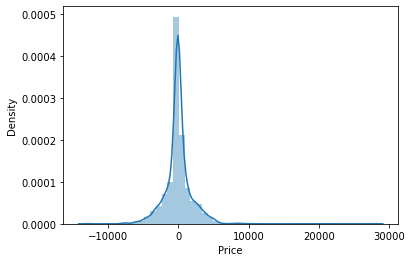

In [405]:
sns.distplot(y_test-y_pred)
plt.show()

Text(0, 0.5, 'y_pred')

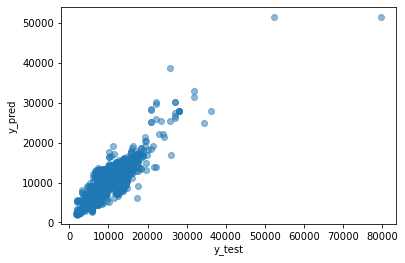

In [417]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")


In [418]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1174.5221194534802
MSE: 3653069.347794096
RMSE: 1911.3004336822864


In [420]:
metrics.r2_score(y_test,y_pred)

0.8308450027497445

In [427]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=4,cv=9,verbose= 2,random_state=65,n_jobs=1)

In [428]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 4 candidates, totalling 36 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;

RandomizedSearchCV(cv=9, estimator=RandomForestRegressor(), n_iter=4, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=65, scoring='neg_mean_squared_error',
                   verbose=2)

In [429]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

<AxesSubplot:xlabel='Price', ylabel='Density'>

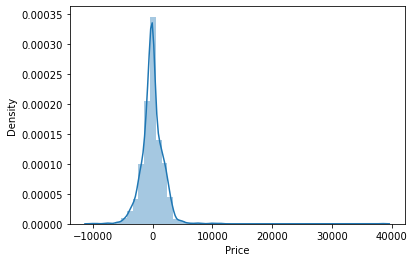

In [432]:
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)

Text(0, 0.5, 'predictions')

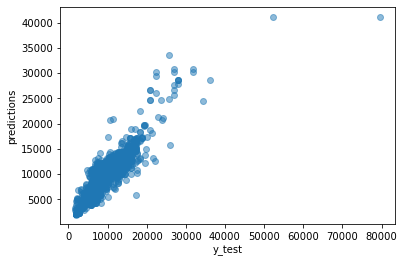

In [433]:
plt.scatter(y_test,predictions,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")


In [434]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1257.7601560656904
MSE: 3637152.990394394
RMSE: 1907.132137633466


In [453]:
#save the model
import pickle
file=open('flight_price_prediction.pkl','wb')
pickle.dump(rf_random,file)


In [454]:
models=open('flight_price_prediction.pkl','rb')
forest=pickle.load(models)

In [455]:
y_prediction=forest.predict(x_test)
metrics.r2_score(y_test,y_prediction)

0.8315820080282801